In [15]:
%pip install tensorflow

  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.5.4-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-macosx_10_9_x86_64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached protobuf-4.25.3-cp37-abi3-macosx_10_9_universal2.whl.metadata (541 bytes)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached tensorboard-2.16.2-py3-none-any.whl.metadata (1.6 kB)
  Using cached Markdown-3.6-py3-none-any.whl.metadata (7.0 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-macosx_10_9_x86_64.whl.metadata (1.1 kB)
  Using cached MarkupSafe-2.1.5-cp312-cp312-macosx_10_9_x86_64.whl.metadata (3.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.7/259.7 MB 1.1 MB/s eta 0:00:0000:0100:04
Using cach

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, precision_score
from sklearn.model_selection import train_test_split, GridSearchCV

In [4]:
#data_sin=pd.read_csv('../../Data/Cleaned/bbank_full_limpio_v0_sindefault.csv')
#data_sin.head()

In [5]:
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google'

In [17]:
data_sin=pd.read_csv('../../Data/Cleaned/bank_full_limpio_v0_sindefault.csv')
data_sin.head()

,age,job,marital,education,balance,housing,loan,car,contact,day,month,duration,campaign,previous,poutcome,subscribed,dia_semana
0,58,0.139,0.102,0.151,0.165,0.078,0.128,0.102,0.041,5,0.068,0.119,1,0,0.093,0,0.122
1,44,0.111,0.151,0.107,0.082,0.078,0.128,0.151,0.041,5,0.068,0.119,1,0,0.093,0,0.122
2,33,0.083,0.102,0.107,0.082,0.078,0.067,0.102,0.041,5,0.068,0.119,1,0,0.093,0,0.122
3,47,0.074,0.102,0.135,0.165,0.078,0.128,0.102,0.041,5,0.068,0.119,1,0,0.093,0,0.122
4,33,0.115,0.151,0.135,0.082,0.168,0.128,0.151,0.041,5,0.068,0.119,1,0,0.093,0,0.122


In [18]:
X=data_sin.drop('subscribed',axis=1)
y=data_sin['subscribed']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=0,shuffle=True)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo 1

In [2]:
from keras.models import Sequential
from keras.layers import Dense

def simple_model_1():
    # Crear el modelo
    model1 = Sequential()
    model1.add(Dense(64, input_shape=(X_train_scaled.shape[1],), activation='relu'))
    model1.add(Dense(32, activation='relu'))
    model1.add(Dense(1, activation='sigmoid'))  # Capa de salida para clasificación binaria

    # Compilar el modelo
    model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model1

2024-05-31 18:08:17.470705: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
model1=simple_model_1()

In [ ]:
history = model1.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
895/895 [==============================] - 3s 3ms/step - loss: 0.3148 - accuracy: 0.8868 - val_loss: 0.2923 - val_accuracy: 0.8948
Epoch 2/100
895/895 [==============================] - 2s 2ms/step - loss: 0.3005 - accuracy: 0.8919 - val_loss: 0.2916 - val_accuracy: 0.8948
Epoch 3/100
895/895 [==============================] - 2s 2ms/step - loss: 0.2973 - accuracy: 0.8912 - val_loss: 0.2899 - val_accuracy: 0.8943
Epoch 4/100
895/895 [==============================] - 2s 3ms/step - loss: 0.2959 - accuracy: 0.8924 - val_loss: 0.2890 - val_accuracy: 0.8952
Epoch 5/100
895/895 [==============================] - 3s 4ms/step - loss: 0.2942 - accuracy: 0.8937 - val_loss: 0.2902 - val_accuracy: 0.8943
Epoch 6/100
895/895 [==============================] - 2s 2ms/step - loss: 0.2936 - accuracy: 0.8940 - val_loss: 0.2890 - val_accuracy: 0.8948
Epoch 7/100
895/895 [==============================] - 2s 2ms/step - loss: 0.2923 - accuracy: 0.8930 - val_loss: 0.2910 - val_accuracy: 0.8918

In [ ]:
loss, accuracy = model1.evaluate(X_test_scaled, y_test)
print(f'Accuracy: {accuracy*100:.2f}%')

280/280 [==============================] - 0s 2ms/step - loss: 0.3468 - accuracy: 0.8809
Accuracy: 88.09%


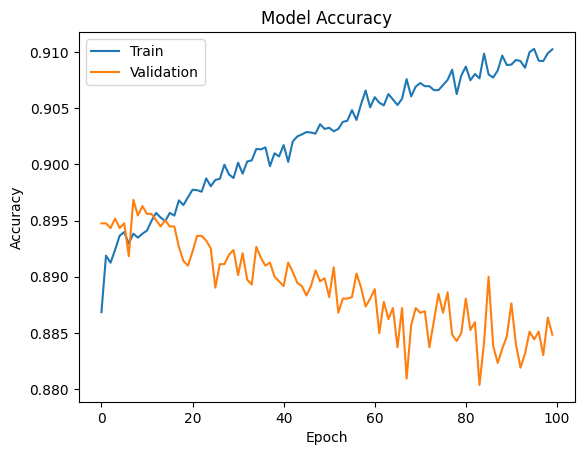

In [ ]:
import matplotlib.pyplot as plt

# Sumarizar el historial para la precisión
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Precisión en Entrenamiento: La línea azul, que representa la precisión en el conjunto de entrenamiento, muestra un aumento constante a lo largo de las épocas, lo cual indica que el modelo está aprendiendo efectivamente de los datos de entrenamiento. Esto es positivo ya que sugiere una buena capacidad del modelo para adaptarse a los datos.


Precisión en Validación: La línea naranja, que muestra la precisión en el conjunto de validación, es bastante volátil y generalmente más baja que la precisión del conjunto de entrenamiento. Esto podría indicar un problema de sobreajuste, donde el modelo aprende detalles específicos del conjunto de entrenamiento que no generalizan bien al conjunto de validación.

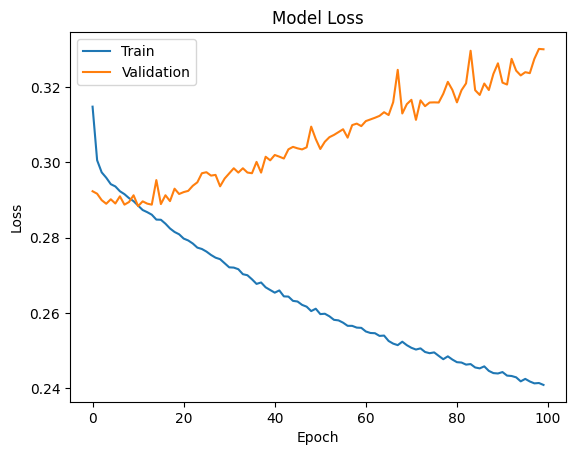

In [ ]:
# Sumarizar el historial para la pérdida
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Pérdida en Entrenamiento: La línea azul indica que la pérdida en el conjunto de entrenamiento disminuye de manera constante, lo cual es un signo de que el modelo está aprendiendo adecuadamente de los datos de entrenamiento.

Pérdida en Validación: La línea naranja muestra un incremento constante en la pérdida del conjunto de validación a partir de aproximadamente la época 20, lo que sugiere que el modelo comienza a desempeñarse peor en los datos de validación conforme avanza el entrenamiento. Esto es un claro indicativo de sobreajuste.

# Modelo 2

In [14]:
from keras.layers import Dropout
from keras.regularizers import l2
from keras.optimizers import Adam

def simple_model_2():
    # Crear el modelo con regularización L2 y Dropout
    model2 = Sequential()
    model2.add(Dense(64, input_shape=(X_train_scaled.shape[1],), activation='relu', kernel_regularizer=l2(0.01)))
    model2.add(Dropout(0.5))
    model2.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
    model2.add(Dropout(0.5))
    model2.add(Dense(1, activation='sigmoid'))
    optimizer = Adam(learning_rate=0.0001)
    model2.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model2

In [ ]:
model2=simple_model_2()

In [ ]:
# Entrenar el modelo con un tamaño de lote diferente
history = model2.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=64, verbose=1)

Epoch 1/100
448/448 [==============================] - 2s 3ms/step - loss: 1.1917 - accuracy: 0.7441 - val_loss: 0.9557 - val_accuracy: 0.8841
Epoch 2/100
448/448 [==============================] - 1s 3ms/step - loss: 0.9382 - accuracy: 0.8685 - val_loss: 0.8041 - val_accuracy: 0.8846
Epoch 3/100
448/448 [==============================] - 1s 3ms/step - loss: 0.8101 - accuracy: 0.8798 - val_loss: 0.6978 - val_accuracy: 0.8872
Epoch 4/100
448/448 [==============================] - 1s 3ms/step - loss: 0.7057 - accuracy: 0.8825 - val_loss: 0.6141 - val_accuracy: 0.8925
Epoch 5/100
448/448 [==============================] - 1s 3ms/step - loss: 0.6247 - accuracy: 0.8852 - val_loss: 0.5480 - val_accuracy: 0.8939
Epoch 6/100
448/448 [==============================] - 2s 4ms/step - loss: 0.5607 - accuracy: 0.8867 - val_loss: 0.4956 - val_accuracy: 0.8948
Epoch 7/100
448/448 [==============================] - 2s 4ms/step - loss: 0.5092 - accuracy: 0.8860 - val_loss: 0.4541 - val_accuracy: 0.8948

In [ ]:
loss, accuracy = model2.evaluate(X_test_scaled, y_test)
print(f'Accuracy: {accuracy*100:.2f}%')

280/280 [==============================] - 0s 2ms/step - loss: 0.3115 - accuracy: 0.8927
Accuracy: 89.27%


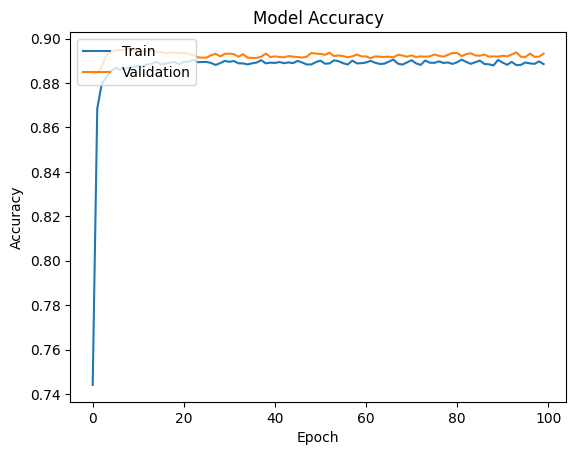

In [ ]:
# Sumarizar el historial para la precisión
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

La precisión tanto en el entrenamiento como en la validación es bastante estable y cercana entre sí, lo cual es un buen indicativo de que el modelo generaliza bien. Este es un cambio positivo en comparación con el primer modelo, donde había una variabilidad significativa en la precisión de validación.

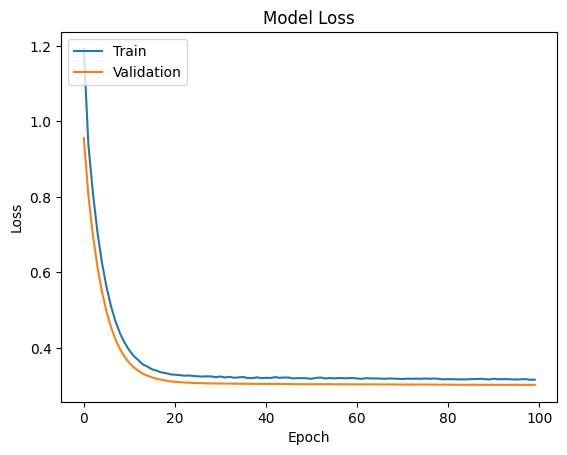

In [ ]:
# Sumarizar el historial para la pérdida
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

La pérdida en ambos, entrenamiento y validación, disminuye rápidamente y luego se estabiliza, manteniendo valores muy cercanos a lo largo de las épocas restantes. Esto sugiere que el modelo no está sobreajustando, como era el caso en el primer modelo, donde la pérdida de validación comenzó a aumentar después de un tiempo.

# Hyper Modelo

In [35]:
%pip install keras-tuner

  Using cached keras_tuner-1.4.7-py3-none-any.whl.metadata (5.4 kB)
  Using cached kt_legacy-1.0.5-py3-none-any.whl.metadata (221 bytes)
Using cached keras_tuner-1.4.7-py3-none-any.whl (129 kB)
Using cached kt_legacy-1.0.5-py3-none-any.whl (9.6 kB)
Note: you may need to restart the kernel to use updated packages.


In [36]:
from kerastuner import HyperModel
from kerastuner.tuners import RandomSearch
from keras.layers import Dropout, Dense
from keras.models import Sequential
from keras.optimizers import Adam
from keras.regularizers import l2

class MyHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
        model = Sequential()
        model.add(Dense(
            units=hp.Int('units', 32, 128, step=32, default=64),
            activation='relu',
            input_shape=(self.input_shape,),
            kernel_regularizer=l2(hp.Float('l2', 1e-4, 1e-2, sampling='log'))))
        model.add(Dropout(hp.Float('dropout_1', 0.3, 0.7, step=0.1, default=0.5)))
        for i in range(hp.Int('layers', 1, 3)):
            model.add(Dense(
                units=hp.Int(f'units_{i}', 32, 128, step=32),
                activation='relu',
                kernel_regularizer=l2(hp.Float(f'l2_{i}', 1e-4, 1e-2, sampling='log'))))
            model.add(Dropout(hp.Float(f'dropout_{i+1}', 0.3, 0.7, step=0.1)))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(
            optimizer=Adam(hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')),
            loss='binary_crossentropy',
            metrics=['accuracy'])
        return model


/var/folders/4f/gbmqzwn51yg8gh7yyxzgpcl80000gn/T/ipykernel_96817/830688334.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import HyperModel


In [ ]:

# Crear una instancia del modelo hypermodel
hypermodel = MyHyperModel(input_shape=X_train_scaled.shape[1])

# Configurar el tuner
tuner = RandomSearch(
    hypermodel,
    objective='val_loss',
    max_trials=20,
    executions_per_trial=2,
    directory='my_dir',
    project_name='keras_tuner_demo')

# Iniciar la búsqueda
tuner.search(X_train_scaled, y_train, epochs=10, validation_split=0.2, verbose=1)

# Obtener el mejor modelo
best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()

## Entrenamiento Final del Modelo

In [ ]:
# Configuración del modelo con los mejores hiperparámetros
final_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compilando el modelo final
final_model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo en el conjunto de datos completo (entrenamiento + validación)
#X_full_scaled = np.vstack((X_train_scaled, X_test_scaled))  # Combina train y validation sets para el entrenamiento final
#y_full = np.hstack((y_train, y_test))

#final_model.fit(X_full_scaled, y_full, epochs=10, batch_size=64, verbose=1)
history = final_model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=10, batch_size=64, verbose=1)

Epoch 1/10
448/448 [==============================] - 3s 4ms/step - loss: 1.5138 - accuracy: 0.8005 - val_loss: 1.2101 - val_accuracy: 0.8841
Epoch 2/10
448/448 [==============================] - 1s 3ms/step - loss: 1.0966 - accuracy: 0.8816 - val_loss: 0.9233 - val_accuracy: 0.8875
Epoch 3/10
448/448 [==============================] - 1s 3ms/step - loss: 0.8547 - accuracy: 0.8848 - val_loss: 0.7299 - val_accuracy: 0.8924
Epoch 4/10
448/448 [==============================] - 2s 4ms/step - loss: 0.6904 - accuracy: 0.8868 - val_loss: 0.5963 - val_accuracy: 0.8939
Epoch 5/10
448/448 [==============================] - 2s 5ms/step - loss: 0.5712 - accuracy: 0.8877 - val_loss: 0.5051 - val_accuracy: 0.8945
Epoch 6/10
448/448 [==============================] - 2s 4ms/step - loss: 0.4940 - accuracy: 0.8894 - val_loss: 0.4429 - val_accuracy: 0.8946
Epoch 7/10
448/448 [==============================] - 1s 3ms/step - loss: 0.4398 - accuracy: 0.8889 - val_loss: 0.4003 - val_accuracy: 0.8941
Epoch 

##  Evaluación del Modelo

In [ ]:
# Suponiendo que tienes un conjunto de test separado que no fue utilizado
loss, accuracy = final_model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {accuracy*100:.2f}%')
print(f'Test Loss: {loss}')

280/280 [==============================] - 1s 2ms/step - loss: 0.3463 - accuracy: 0.8927
Test Accuracy: 89.27%
Test Loss: 0.34630101919174194


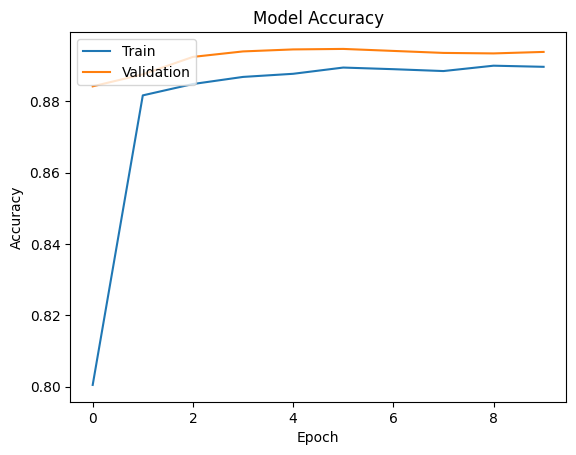

In [ ]:
# Sumarizar el historial para la precisión
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

La precisión del modelo en el conjunto de entrenamiento y validación es bastante alta y estable, con la línea de validación siguiendo de cerca a la línea de entrenamiento, lo que indica un buen equilibrio y que el modelo generaliza bien.

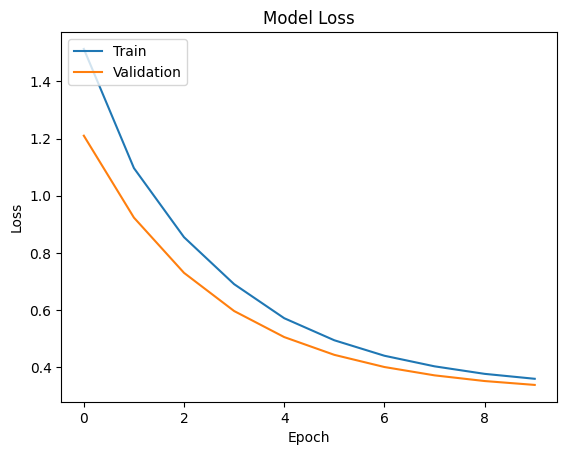

In [ ]:
# Sumarizar el historial para la pérdida
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

La pérdida en ambos conjuntos disminuye de manera constante y se estabiliza, lo cual es un indicativo positivo de que el modelo está aprendiendo adecuadamente sin sobreajustarse significativamente.

In [ ]:
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Realizar predicciones probabilísticas con el modelo
y_pred_prob = final_model.predict(X_test_scaled).ravel()  # Obtener probabilidades
y_pred = (y_pred_prob > 0.5).astype(int)  # Convertir probabilidades a etiquetas binarias

# Calcular las métricas de clasificación
print(classification_report(y_test, y_pred))

280/280 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7907
           1       0.65      0.16      0.26      1036

    accuracy                           0.89      8943
   macro avg       0.77      0.58      0.60      8943
weighted avg       0.87      0.89      0.86      8943



In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Asegúrate de que los datos son arrays de NumPy directamente
X = np.array(X_train_scaled)
y = np.array(y_train)

def create_model(l2_rate, learning_rate):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X.shape[1],), kernel_regularizer=l2(l2_rate)),
        Dropout(0.5),
        Dense(64, activation='relu', kernel_regularizer=l2(l2_rate)),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Configuración de la validación cruzada
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Ejecutar la validación cruzada
auc_scores = []
for train_index, test_index in skf.split(X, y):
    X_train_fold = X[train_index]
    X_test_fold = X[test_index]
    y_train_fold = y[train_index]
    y_test_fold = y[test_index]

    model = create_model(0.01, 0.0001)  # Ajusta los hiperparámetros según tu optimización
    model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=64, verbose=1)

    # Evaluación del modelo en el conjunto de prueba del pliegue actual
    y_pred_prob = model.predict(X_test_fold).ravel()
    roc_auc = roc_auc_score(y_test_fold, y_pred_prob)
    auc_scores.append(roc_auc)

# Imprimir el rendimiento promedio en todos los pliegues
print(f'Mean ROC AUC Score across all folds: {np.mean(auc_scores)}')

Epoch 1/10
448/448 [==============================] - 4s 6ms/step - loss: 1.4755 - accuracy: 0.8090
Epoch 2/10
448/448 [==============================] - 3s 8ms/step - loss: 1.0517 - accuracy: 0.8829
Epoch 3/10
448/448 [==============================] - 4s 9ms/step - loss: 0.8095 - accuracy: 0.8852
Epoch 4/10
448/448 [==============================] - 3s 6ms/step - loss: 0.6502 - accuracy: 0.8870
Epoch 5/10
448/448 [==============================] - 3s 6ms/step - loss: 0.5471 - accuracy: 0.8879
Epoch 6/10
448/448 [==============================] - 2s 6ms/step - loss: 0.4751 - accuracy: 0.8903
Epoch 7/10
448/448 [==============================] - 1s 2ms/step - loss: 0.4280 - accuracy: 0.8883
Epoch 8/10
448/448 [==============================] - 1s 2ms/step - loss: 0.3958 - accuracy: 0.8890
Epoch 9/10
448/448 [==============================] - 1s 2ms/step - loss: 0.3740 - accuracy: 0.8900
Epoch 10/10
224/224 [==============================] - 1s 2ms/step
Epoch 1/10
448/448 [=============

Los registros de entrenamiento muestran que el modelo alcanza consistentemente una precisión aproximada de 88-89% en cada fold. Esto sugiere que el modelo es estable y produce resultados consistentes a través de diferentes muestras de datos.

La pérdida (loss) disminuye con cada época de entrenamiento, lo que indica que el modelo está aprendiendo efectivamente de los datos en cada fold. La pérdida comienza más alta en la primera época y luego se reduce significativamente, estabilizándose hacia las últimas épocas.

El valor medio del ROC AUC Score es de aproximadamente 0.775. El AUC (Area Under the Curve) mide la capacidad del modelo para discriminar entre las clases positivas y negativas. Un AUC de 0.775 indica una buena capacidad predictiva, aunque podría haber margen para mejorar.

## Modelo Catboost


In [40]:
# Iniciar Modelo
catboost_model = CatBoostClassifier(silent = True, auto_class_weights='Balanced')

# Definir parametros
param_grid = {
    'iterations': [100, 200, 300],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5]
}

Por medio de Grid Search y Cross Validation se obtienen los siguientes pámetros:

    1. depth:6
    2. Iterations:200
    3. l2_leaf_reg:5
    4. learning_rate: 0.05

El modelo resultante obtiene una precision de 37%

In [49]:
# Iniciar el gridsearch
grid_search = GridSearchCV(estimator=catboost_model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='precision')

# Fit Gridsearch
grid_search.fit(X_train, y_train)

print("Mejores parametros: ", grid_search.best_params_)
print("Mejor Precision: ", grid_search.best_score_)


Mejores parametros:  {'depth': 8, 'iterations': 300, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
Mejor Precision:  0.37501174432358747


En la muestra de prueba se obtiene un accuracy del 82.6% y una precision del 34%.

In [55]:
# Escoger el mejor modelo
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluar Modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')

print("Test set accuracy: ", accuracy)
print("Test set precision:", precision)

Test set accuracy:  0.8264564463826456
Test set precision: 0.344578313253012


Se obtiene un AUC de 76%

Test set AUC:  0.7684021489194122


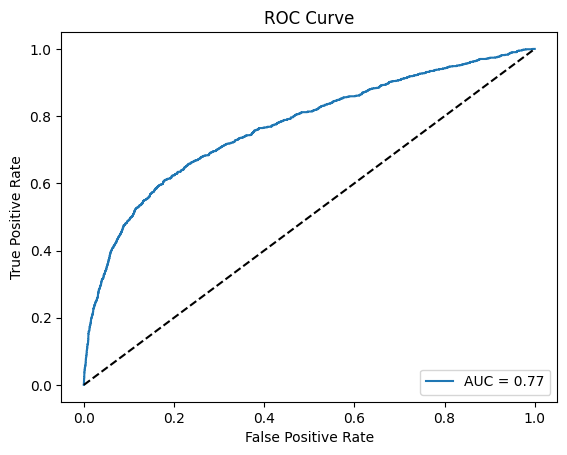

In [47]:
y_pred_proba = best_model.predict_proba(X_test)[:, 1] 

# Evaluar Modelo
auc = roc_auc_score(y_test, y_pred_proba)
print("Test set AUC: ", auc)

# Opcional: graficar la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

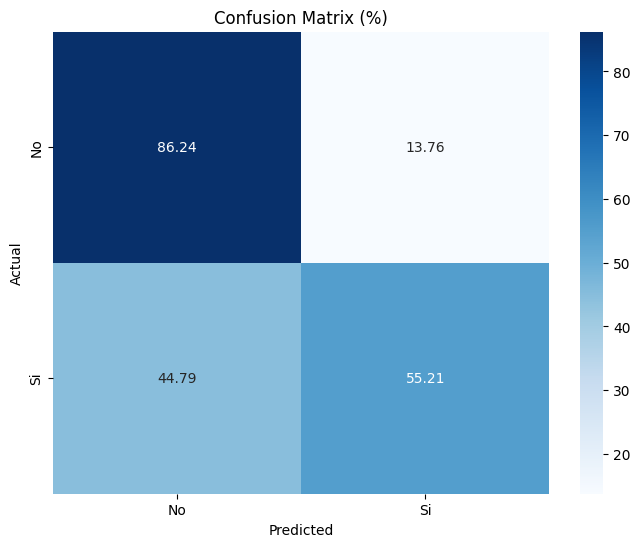

In [51]:
import numpy as np

# Calculate the total number of samples for each class
class_totals = np.sum(cm, axis=1)

# Convert confusion matrix to percentages
cm_percent = np.round(cm / class_totals[:, np.newaxis] * 100, 2)

# Create DataFrame with percentages
cm_df_percent = pd.DataFrame(cm_percent, index=labels, columns=labels)

# Plot confusion matrix with percentages
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df_percent, annot=True, fmt='.2f', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix (%)')
plt.show()

In [24]:
result = pd.DataFrame(zip(best_model.feature_importances_, best_model.feature_names_), 
                      columns=['import','var']).sort_values('import' , ascending=False)
result

,import,var
10,21.885490,month
9,12.266924,day
14,11.587452,poutcome
8,10.156543,contact
15,6.619812,dia_semana
5,6.517756,housing
0,6.274080,age
12,4.609215,campaign
4,4.547350,balance
1,3.370654,job


## **Modelo Red Neuronal sin quitar variables**
---

In [3]:
data_sin=pd.read_csv('../../Data/Cleaned/bank_full_limpio_v0.csv')
data_sin.head()

,age,job,marital,education,default,balance,housing,loan,car,contact,day,month,duration,campaign,previous,poutcome,subscribed,dia_semana
0,58,0.139,0.102,0.151,0.119,0.165,0.078,0.128,0.102,0.041,5,0.068,0.119,1,0,0.093,0,0.122
1,44,0.111,0.151,0.107,0.119,0.082,0.078,0.128,0.151,0.041,5,0.068,0.119,1,0,0.093,0,0.122
2,33,0.083,0.102,0.107,0.119,0.082,0.078,0.067,0.102,0.041,5,0.068,0.119,1,0,0.093,0,0.122
3,47,0.074,0.102,0.135,0.119,0.165,0.078,0.128,0.102,0.041,5,0.068,0.119,1,0,0.093,0,0.122
4,33,0.115,0.151,0.135,0.119,0.082,0.168,0.128,0.151,0.041,5,0.068,0.119,1,0,0.093,0,0.122


In [4]:
X=data_sin.drop('subscribed',axis=1)
y=data_sin['subscribed']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=0,shuffle=True)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### **Modelo simple 1**

In [26]:
model1=simple_model_1()

In [27]:
history = model1.fit(X_train_scaled, y_train, validation_split=0.2, epochs=25, batch_size=32, verbose=1)

Epoch 1/25
895/895 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8800 - loss: 0.3440 - val_accuracy: 0.8935 - val_loss: 0.2960
Epoch 2/25
895/895 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8909 - loss: 0.3027 - val_accuracy: 0.8950 - val_loss: 0.2911
Epoch 3/25
895/895 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8912 - loss: 0.2991 - val_accuracy: 0.8928 - val_loss: 0.2909
Epoch 4/25
895/895 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8876 - loss: 0.3044 - val_accuracy: 0.8957 - val_loss: 0.2885
Epoch 5/25
895/895 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8946 - loss: 0.2951 - val_accuracy: 0.8920 - val_loss: 0.2901
Epoch 6/25
895/895 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8942 - loss: 0.2917 - val_accuracy: 0.8925 - val_loss: 0.2921
Epoch 7/25
895/895 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8946 - loss: 0.2923 - val_accuracy: 0.8931 - val_loss: 0.2916
Epoch 8/25
895/895 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8947 - loss: 0.2933 - val_accuracy: 0.

280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - accuracy: 0.8838 - loss: 0.3181
Accuracy: 89.10%


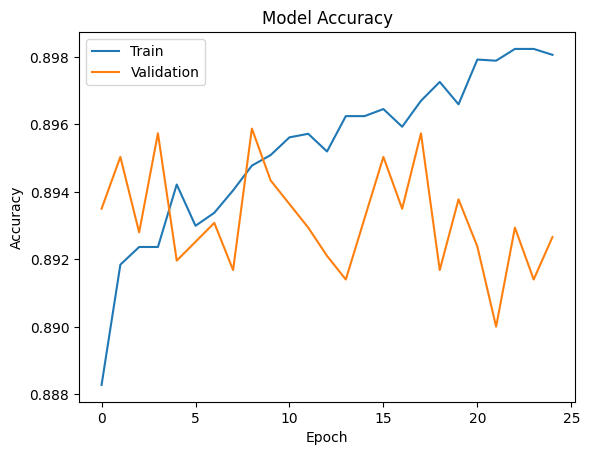

In [28]:
loss, accuracy = model1.evaluate(X_test_scaled, y_test)
print(f'Accuracy: {accuracy*100:.2f}%')
# Sumarizar el historial para la precisión
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

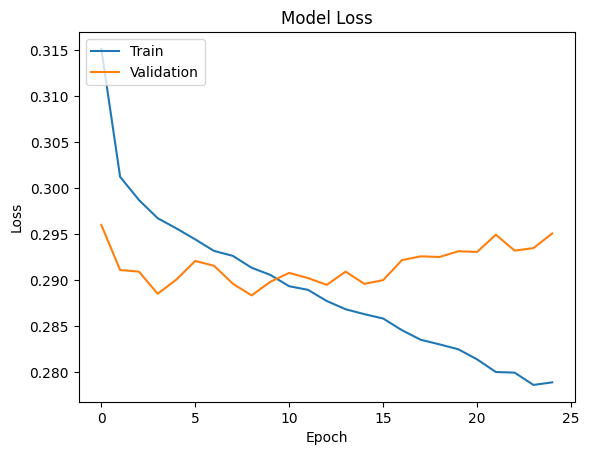

In [29]:
# Sumarizar el historial para la pérdida
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### **Model 2 con todo**

In [22]:
model2=simple_model_2()

/Users/mariolamas/anaconda3/envs/entorno_cluster/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
history = model2.fit(X_train_scaled, y_train, validation_split=0.2, epochs=35, batch_size=32, verbose=1)

Epoch 1/35
895/895 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7216 - loss: 1.2272 - val_accuracy: 0.8841 - val_loss: 0.8637
Epoch 2/35
895/895 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8748 - loss: 0.8660 - val_accuracy: 0.8871 - val_loss: 0.6832
Epoch 3/35
895/895 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8786 - loss: 0.7042 - val_accuracy: 0.8878 - val_loss: 0.5686
Epoch 4/35
895/895 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8845 - loss: 0.5874 - val_accuracy: 0.8904 - val_loss: 0.4899
Epoch 5/35
895/895 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8846 - loss: 0.5119 - val_accuracy: 0.8929 - val_loss: 0.4357
Epoch 6/35
895/895 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8841 - loss: 0.4539 - val_accuracy: 0.8928 - val_loss: 0.3967
Epoch 7/35
895/895 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8831 - loss: 0.4203 - val_accuracy: 0.8935 - val_loss: 0.3696
Epoch 8/35
895/895 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8900 - loss: 0.3837 - val_accuracy: 0.

280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8886 - loss: 0.3222
Accuracy: 89.25%
Accuracy: 89.25%


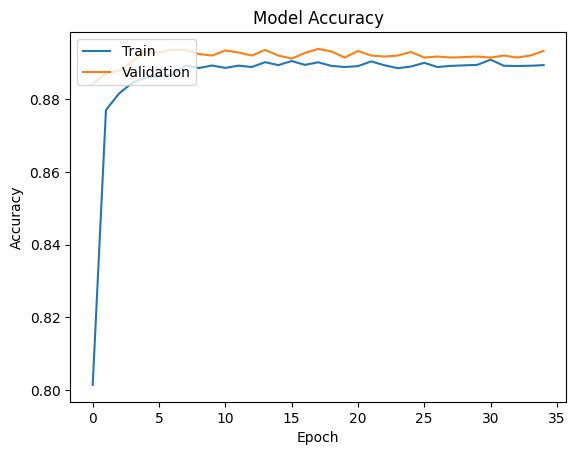

In [24]:
loss, accuracy = model2.evaluate(X_test_scaled, y_test)
print(f'Accuracy: {accuracy*100:.2f}%')
print(f'Accuracy: {accuracy*100:.2f}%')
# Sumarizar el historial para la precisión
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

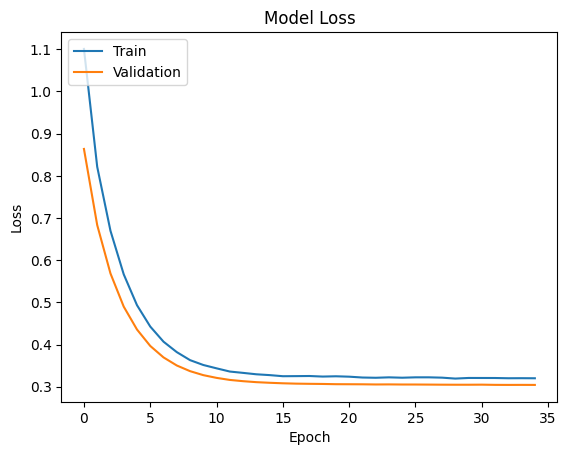

In [25]:
# Sumarizar el historial para la pérdida
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [37]:
hypermodel = MyHyperModel(input_shape=X_train_scaled.shape[1])

# Configurar el tuner
tuner = RandomSearch(
    hypermodel,
    objective='val_loss',
    max_trials=20,
    executions_per_trial=2,
    directory='my_dir',
    project_name='keras_tuner_demo')

# Iniciar la búsqueda
tuner.search(X_train_scaled, y_train, epochs=10, validation_split=0.2, verbose=1)

# Obtener el mejor modelo
best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()

Trial 20 Complete [00h 00m 42s]
val_loss: 0.3064016103744507

Best val_loss So Far: 0.29739369451999664
Total elapsed time: 00h 17m 22s


/Users/mariolamas/anaconda3/envs/entorno_cluster/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,625 (41.50 KB)

 Trainable params: 10,625 (41.50 KB)

 Non-trainable params: 0 (0.00 B)

280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - accuracy: 0.8863 - loss: 0.3178
Accuracy: 89.13%
Accuracy: 89.13%


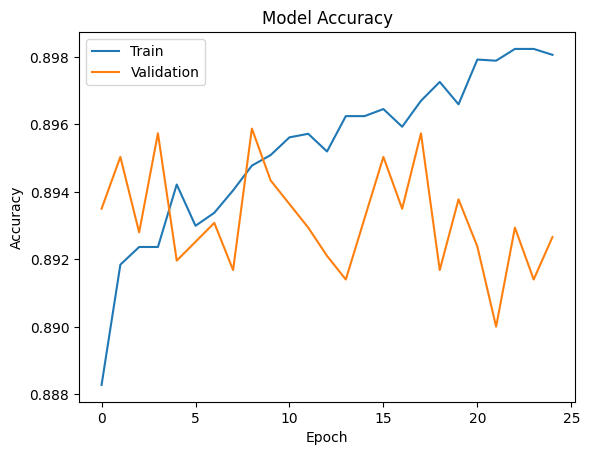

In [39]:
loss, accuracy = best_model.evaluate(X_test_scaled, y_test)
print(f'Accuracy: {accuracy*100:.2f}%')
print(f'Accuracy: {accuracy*100:.2f}%')
# Sumarizar el historial para la precisión
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [43]:
best_model.history.history

{}